In [269]:
import pandas as pd


df = pd.read_csv('adult 3.csv')


df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [270]:


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [271]:

df.describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [272]:

df.isnull().sum()


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [273]:

for col in df.select_dtypes(include='object').columns:
    missing = (df[col] == '?').sum()
    if missing > 0:
        print(f"{col}: {missing} missing entries")


workclass: 2799 missing entries
occupation: 2809 missing entries
native-country: 857 missing entries


In [274]:
df['workclass'] = df['workclass'].replace('?', 'Unknown')
df['occupation'] = df['occupation'].replace('?', 'Unknown')
df['native-country'] = df['native-country'].replace('?', 'Unknown')


In [275]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [276]:
X = df.drop('income', axis=1)
y = df['income']


In [277]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8638550516941345
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.64      0.69      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769



In [278]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('adult 3.csv')
print("Dataset loaded. Shape:", df.shape)

df.head()


Dataset loaded. Shape: (48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [279]:

df.info()

for col in df.select_dtypes(include='object').columns:
    missing = (df[col] == '?').sum()
    if missing > 0:
        print(f"{col}: {missing} missing entries")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
workclass: 2799 missing entries
occupation: 2809 missing entries
native-coun

In [280]:

df['workclass'] = df['workclass'].replace('?', 'Unknown')
df['occupation'] = df['occupation'].replace('?', 'Unknown')
df['native-country'] = df['native-country'].replace('?', 'Unknown')
print("Missing values replaced with 'Unknown'.")


Missing values replaced with 'Unknown'.


In [281]:
import pickle
label_encoders = {}

for col in ['education', 'occupation', 'native-country', 'income']:
    le = LabelEncoder()

    
    le.fit(df[col].unique())
    df[col] = le.transform(df[col])
    label_encoders[col] = le


with open("encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

print("✅ Encoders saved as encoders.pkl")



✅ Encoders saved as encoders.pkl


In [282]:

X = df[['education', 'occupation', 'native-country', 'hours-per-week']]

y = df['income']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=50, max_depth=10)
model.fit(X_train, y_train)
print("Model training completed.")


Model training completed.


In [283]:
import pickle
with open("salary_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [284]:
import pickle
with open("salary_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [285]:

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.7978

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.64      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



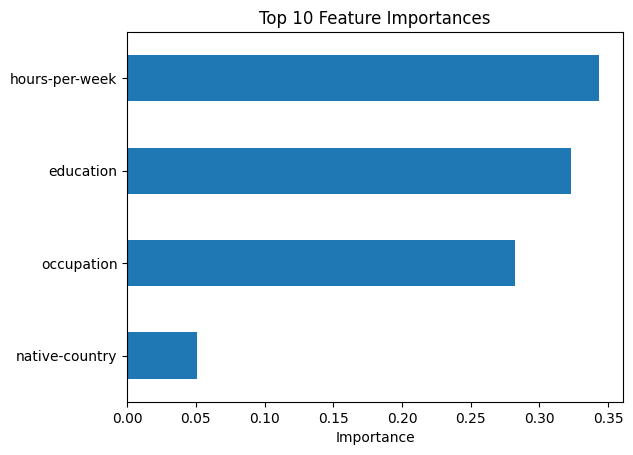

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.show()


In [287]:

df_cleaned = df.copy()
if 'income' in df_cleaned.columns and 'income' in label_encoders:
    le = label_encoders['income']
    df_cleaned['income'] = le.inverse_transform(df_cleaned['income'])


df_cleaned.to_csv('cleaned_adult.csv', index=False)
print("Cleaned dataset saved as 'cleaned_adult.csv'.")


Cleaned dataset saved as 'cleaned_adult.csv'.


In [288]:
import pickle

with open("salary_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully.")


Model saved successfully.


In [289]:
import gdown
import os

# Google Drive File ID for salary_model.pkl
file_id = "1jZpsnreuGQLpTXGXJ-5KQrQpzpf-CNRi"
url = f"https://drive.google.com/uc?id={file_id}"

# Download if not already downloaded
if not os.path.exists("salary_model.pkl"):
    gdown.download(url, "salary_model.pkl", quiet=False)


In [290]:
import pickle

try:
    with open("salary_model.pkl", "rb") as f:
        model = pickle.load(f)
except Exception as e:
    print(f"Error loading model: {e}")


In [291]:
# Google Drive File ID for encoders.pkl
file_id = "1lKCNINYN15kqu0gY-mSABLl0qljcZ47d"
url = f"https://drive.google.com/uc?id={file_id}"

# Download if not already downloaded
if not os.path.exists("encoders.pkl"):
    gdown.download(url, "encoders.pkl", quiet=False)


In [292]:
import pickle

with open("salary_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

print(encoders.keys())  # should print: dict_keys(['education', 'occupation', 'native-country', ...])


dict_keys(['education', 'occupation', 'native-country', 'income'])


In [293]:
import pickle

# Example: your trained model is named `model`
with open("salary_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Example: your label encoders dictionary is named `label_encoders`
with open("encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

print("✅ Files saved correctly.")


✅ Files saved correctly.


In [294]:
with open("salary_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

print(model)
print(encoders.keys())  # should print keys like dict_keys(['education', 'occupation', ...])


RandomForestClassifier(max_depth=10, n_estimators=50)
dict_keys(['education', 'occupation', 'native-country', 'income'])
